# Data Science I - Project

This project is about to focus on levels of survival and mortality in relation to the age, sex and ticket class aspects. At each question I use the print to display a direct response on the question or a chart and the conclusion about the chart.
<br> This are the question I will make:
<li>Number of men and women on board.</li>
<li>Proportion of surviving men and women.</li>
<li>Surviving men by age.</li>
<li>Non surviving men by age.</li>
<li>Non surviving female by age.</li>
<li>Surviving women by age.</li>
<li>Surviving men by class.</li>
<li>Surviving women by class.</li>
<li>Non surviving men by class.</li>
<li>Non surviving women by class.</li>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
df=pd.read_csv('titanic-data-6.csv')

### Data preparation phase

Now that data is loaded, I'll make the following changes:

<li>For data cleaning, df dataframe was filtered by sex field.</li>
<li>Taking advantage of the first level of filtering by sex, a second filter was applied for survived field.</li>
<li>Using the drop filter to extract a Series of age from surviving men. Then, discarding NaN values using dropna filter.</li>
<li>After querying non surviving men, using the drop filter to extract a Series of age from non surviving men. Then, discarding NaN values using dropna filter.</li>
<li>After querying non surviving women, using the drop filter to extract a Series of age from non surviving women. Then, discarding NaN values using dropna filter.</li>
<li>Using the drop filter to extract a Series of age from surviving women. Then, discarding NaN values using dropna filter.</li>
<li>Using the drop filter to extract a Series of pclass from surviving men.</li>
<li>Using the drop filter to extract a Series of pclass from surviving women.</li>
<li>Using the drop filter to extract a Series of pclass from non surviving men.</li>
<li>Using the drop filter to extract a Series of pclass from non surviving women.</li>
<br>Each step is made for each question about the data.


In [2]:
######### Plotting functions ######################
def plotting_pizza (freq_list, label_list, title):
    plt.title(title)
    plt.pie(freq_list, labels=label_list, autopct='%1.1f%%')
    plt.show()
###################################################

### Q: Number of men and women on board.

For data cleaning, df dataframe was filtered by sex field.

Male   = 577
Female = 314


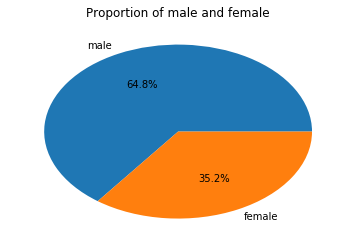

In [3]:
######### Number of male and female ? ############
##################################################
# Filtering by sex
dfmale  = df.query('Sex == "male"')
dfemale = df.query('Sex == "female"')
# Counting number of male and female
nmale   =  dfmale['Sex'].value_counts().iat[0]
nfemale = dfemale['Sex'].value_counts().iat[0]
print('Male   = {}'.format(nmale))
print('Female = {}'.format(nfemale))
# Plotting the results
freq_list = [nmale, nfemale]
labels_list = ['male','female']
title = 'Proportion of male and female'
plotting_pizza(freq_list, labels_list, title)

In [4]:
dfemale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 1 to 888
Data columns (total 12 columns):
PassengerId    314 non-null int64
Survived       314 non-null int64
Pclass         314 non-null int64
Name           314 non-null object
Sex            314 non-null object
Age            261 non-null float64
SibSp          314 non-null int64
Parch          314 non-null int64
Ticket         314 non-null object
Fare           314 non-null float64
Cabin          97 non-null object
Embarked       312 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 31.9+ KB


Chart 1: In this chart we see the proportion of male and female on board.

### Q: Proportion of surviving men and women.

Taking advantage of the first level of filtering by sex, a second filter was applied for survived field.

Survived male   = 109 from 577 (19.0% of surviving)
Survived female = 233 from 314 (74.0% of surviving)


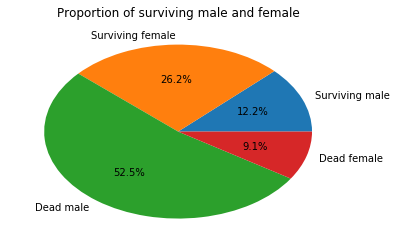

In [5]:
######### Number of surviving male and female #########
#######################################################
# 2nd level of filtering by surviving
alive_male    =  dfmale.query('Survived == 1')
alive_female  = dfemale.query('Survived == 1')
# Counting number of surviving male and female
nalive_male   =   alive_male['Survived'].value_counts().iat[0]
nalive_female = alive_female['Survived'].value_counts().iat[0]
print('Survived male   = {} from {} ({}% of surviving)'.format(nalive_male, nmale, round(100*nalive_male/nmale)))
print('Survived female = {} from {} ({}% of surviving)'.format(nalive_female, nfemale, round(100*nalive_female/nfemale)))
dead_male   = nmale   - nalive_male
dead_female = nfemale - nalive_female
# Plotting the results
surv_list=[nalive_male, nalive_female, dead_male, dead_female]
label_list=['Surviving male','Surviving female','Dead male','Dead female']
title='Proportion of surviving male and female'
plotting_pizza(surv_list, label_list, title)

Chart 2: This chart show us two dead man for each dead woman. Despite the greater number of men on board, only 19% of men survived. Women had a higher survival rate of 74%.

### Q: Surviving men by age.

Using the drop filter to extract a Series of age from surviving men. Then, discarding NaN values using dropna filter.

Mean   age of surviving men = 27.0
Median age of surviving men = 28.0


Text(0,0.5,'Age')

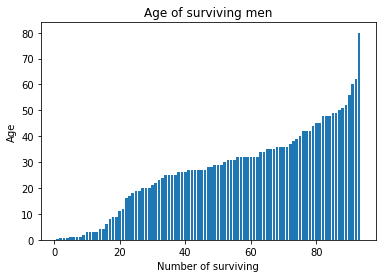

In [6]:
######### Surviving male by age #########
#########################################
# Series only for age
age_surv_male = alive_male.drop(['PassengerId','Survived','Pclass','Name','Sex','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)
# Discarding NaN values
age_surv_male.dropna(inplace=True)
# Mean and median age of surviving male
print('Mean   age of surviving men = {}'.format(round(age_surv_male.mean().iat[0])))
print('Median age of surviving men = {}'.format(round(age_surv_male.median().iat[0])))
# range of surviving male by age
index_male = list(range(1,age_surv_male.size+1)) 
# ploting the results
plt.bar(index_male, age_surv_male['Age'].sort_values())
plt.title('Age of surviving men')
plt.xlabel('Number of surviving')
plt.ylabel('Age')

Chart 3: Distribution of surviving men by age. We see a higher number of survival men between 15 and 50 years old. 
We also see the median age of 28 years old. We can infer a higher tax of survival around 28 years old for men.

### Q: Non surviving men by age.

After querying non surviving men, using the drop filter to extract a Series of age from non surviving men. Then, discarding NaN values using dropna filter.

Median age of non surviving men = 29.0


Text(0,0.5,'Age')

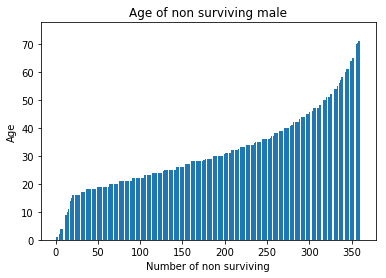

In [7]:
######### Non surviving male by age #########
#########################################
dead_male     = dfmale.query('Survived == 0')
age_dead_male = dead_male.drop(['PassengerId','Survived','Pclass','Name','Sex','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)
age_dead_male.dropna(inplace=True)
# median age of non surviving male
print('Median age of non surviving men = {}'.format(round(age_dead_male.median().iat[0])))
index_dead_male = list(range(1,age_dead_male.size+1)) 
plt.bar(index_dead_male, age_dead_male['Age'].sort_values())
plt.title('Age of non surviving male')
plt.xlabel('Number of non surviving')
plt.ylabel('Age')

Chart 4: According to chart 3, the median age of surviving and non surviving men are almost the same, 28 and 29 years old. But we can see on chart 4 a higher number of non survival men above 50 years old when compared to chart 3. Comparing charts 3 and 4, under 15 years old, the number of surviving and non surviving men shows similar results.
    

### Q: Non surviving female by age

After querying non surviving women, using the drop filter to extract a Series of age from non surviving women. Then, discarding NaN values using dropna filter.

Median age of non surviving women = 24.0


Text(0,0.5,'Age')

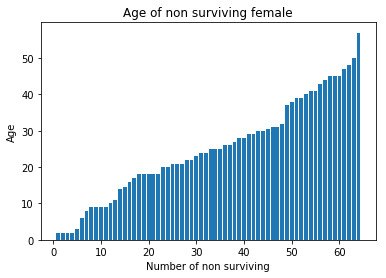

In [8]:
######### Non surviving female by age #########
#########################################
dead_female     = dfemale.query('Survived == 0')
age_dead_female = dead_female.drop(['PassengerId','Survived','Pclass','Name','Sex','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)
age_dead_female.dropna(inplace=True)
# median age of non surviving male
print('Median age of non surviving women = {}'.format(round(age_dead_female.median().iat[0])))
# plotting
index_dead_female = list(range(1,age_dead_female.size+1)) 
plt.bar(index_dead_female, age_dead_female['Age'].sort_values())
plt.title('Age of non surviving female')
plt.xlabel('Number of non surviving')
plt.ylabel('Age')

Chart 5: The median age of non surviving women is less than non surviving men, 24 years old.

### Q: Surviving women by age

Using the drop filter to extract a Series of age from surviving women. Then, discarding NaN values using dropna filter.

Median age of surviving women = 28.0


Text(0,0.5,'Age')

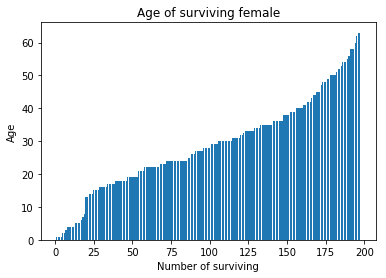

In [9]:
######### Surviving female by age #########
###########################################
# Series only for age
age_surv_female = alive_female.drop(['PassengerId','Survived','Pclass','Name','Sex','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)
# Discarding NaN values
age_surv_female.dropna(inplace=True)
# median age of surviving female
print('Median age of surviving women = {}'.format(round(age_surv_female.median().iat[0])))
# range of surviving female by age
index_female = list(range(1,age_surv_female.size+1)) 
# plot
plt.bar(index_female, age_surv_female['Age'].sort_values())
plt.title('Age of surviving female')
plt.xlabel('Number of surviving')
plt.ylabel('Age')

Chart 6: The median age of suviving women is the same of surviving men, 28 years old. We can infer the same tax of survival for women around 28 years old.

### Q: Surviving men by class.

Using the drop filter to extract a Series of pclass from surviving men. 

Text(0,0.5,'Pclass')

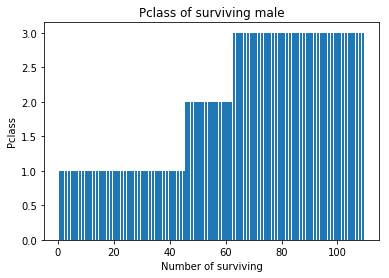

In [10]:
######### Surviving male by class #########
###########################################
# Series only for pclass
pclass_surv_male = alive_male.drop(['PassengerId','Survived','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)
# range of surviving male by class
index_pclass_surv_male = list(range(1,pclass_surv_male.size+1))
# plot
plt.bar(index_pclass_surv_male, pclass_surv_male['Pclass'].sort_values())
plt.title('Pclass of surviving male')
plt.xlabel('Number of surviving')
plt.ylabel('Pclass')

Chart 7: For men, 1st and 3rd class in similar proportion of surviving. 

In [11]:
pclass_surv_male.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 17 to 889
Data columns (total 1 columns):
Pclass    109 non-null int64
dtypes: int64(1)
memory usage: 1.7 KB


### Q: Surviving women by class.

Using the drop filter to extract a Series of pclass from surviving women. 

Text(0,0.5,'Pclass')

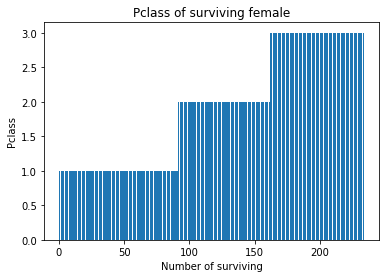

In [12]:
######### Surviving female by class #########
#############################################
# Series only for pclass
pclass_surv_female = alive_female.drop(['PassengerId','Survived','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)
# range of surviving female by class
index_pclass_surv_female = list(range(1,pclass_surv_female.size+1))
# plot
plt.bar(index_pclass_surv_female, pclass_surv_female['Pclass'].sort_values())
plt.title('Pclass of surviving female')
plt.xlabel('Number of surviving')
plt.ylabel('Pclass')


Chart 8: For women, all classes in similar proportions of surviving.

In [13]:
pclass_surv_female.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 1 to 887
Data columns (total 1 columns):
Pclass    233 non-null int64
dtypes: int64(1)
memory usage: 3.6 KB


### Q: Non surviving men by class.

Using the drop filter to extract a Series of pclass from non surviving men. 

3    300
2     91
1     77
Name: Pclass, dtype: int64


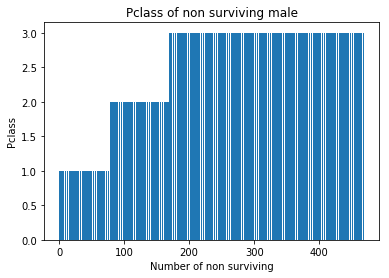

In [26]:
######### Non surviving male by class #########
###############################################
# Series only for pclass
nonalive_male    =  dfmale.query('Survived == 0')
pclass_nonsurv_male = nonalive_male.drop(['PassengerId','Survived','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)
#print(pclass_nonsurv_male)
 #pclass_nonsurv_male.head()
# range of non surviving male by class
index_pclass_nonsurv_male = list(range(1,pclass_nonsurv_male.size+1))
# plot
plt.bar(index_pclass_nonsurv_male, pclass_nonsurv_male['Pclass'].sort_values())
plt.title('Pclass of non surviving male')
plt.xlabel('Number of non surviving')
plt.ylabel('Pclass')
# counting number of non surviving men by pclass
non_surv_men_class1 = pclass_nonsurv_male['Pclass'].value_counts()
print(non_surv_men_class1)

Chart 9: For men, 3rd class in greater proportion of fatality: 300 of 468 is 64,1% of non surving from 3rd class.

In [15]:
pclass_nonsurv_male.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 0 to 890
Data columns (total 1 columns):
Pclass    468 non-null int64
dtypes: int64(1)
memory usage: 7.3 KB


### Q: Non surviving women by class

Using the drop filter to extract a Series of pclass from non surviving women. 

3rd class in greater proportion of fatality
3    72
2     6
1     3
Name: Pclass, dtype: int64


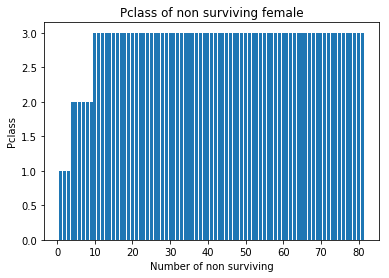

In [27]:
######### Non surviving female by class #########
#################################################
# Series only for pclass
nonalive_female    =  dfemale.query('Survived == 0')
pclass_nonsurv_female = nonalive_female.drop(['PassengerId','Survived','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)
# range of non surviving male by class
index_pclass_nonsurv_female = list(range(1,pclass_nonsurv_female.size+1))
# plot
plt.bar(index_pclass_nonsurv_female, pclass_nonsurv_female['Pclass'].sort_values())
plt.title('Pclass of non surviving female')
plt.xlabel('Number of non surviving')
plt.ylabel('Pclass')
print('3rd class in greater proportion of fatality')
# counting number of non surviving men by pclass
non_surv_women_class1 = pclass_nonsurv_female['Pclass'].value_counts()
print(non_surv_women_class1)

Chart 10: As well as men in chart 9, women from 3rd class in greater proportion of fatality too: 72 from 81 is 88,9%  of non surving women from de 3rd class.

In [17]:
pclass_nonsurv_female.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 14 to 888
Data columns (total 1 columns):
Pclass    81 non-null int64
dtypes: int64(1)
memory usage: 1.3 KB


### Conclusão

Analisando os dados do acidente do Titanic, fica evidente que os passageiros das classes superiores foram privilegiados durante o embarque nos botes salva-vidas.
<br>Do total de passageiros, 64,8 % foram homens.
<br>Apenas 19% dos homens sobreviveram, já as mulheres tiveram uma taxa de sobrevivência de 74%.
<br>A idade média dos passageiros: dos homens e das mulheres sobreviventes (28 anos); dos homens não sobrevientes é similar (29 anos); das mulheres não sobreviventes (24 anos).
<br>Homens e mulheres da 3a classe tiveram uma maior proporção de fatalidades. 64% dos homens mortos estavam na 3a classe. E 89% das mulheres mortas estavam na 3a classe.


### Limitações

Algumas propriedades não possuíam valores para alguns passageiros. Foi o caso dos campos: Age, Cabin e Embarked.
Neste trabalho o campo Age foi utilizado na geração das estatísticas de sobrevivência por idade.
<br>Medida tomada:
    <li>Os valores faltantes foram desconsiderados (dropna).</li>